# **THE SPARKS FOUNDATION #GRIP_MAR_2023**

**Author - RHIJUTA NAMDEO, DATA SCIENCE & BUSINESS ANALYTICS INTERN**

**TASK-2 Prediction using Unsupervised Machine Learning**<br>
In this task it is required to predict the optimum number of cluster for the iris data set .<br>
Iris data set consists of 3 types of flower namely Iris-setosa Iris-versicolour and Iris-virginica

In [ ]:
Dataset Sample: https://bit.ly/3kXTdox

#### Steps :

- Step 1 - Importing the required libraries
- Step 2 - Visualisng the data  
- Step 3 - Finding the optimum number of clusters
- Step 4 - Applying k means clustering on the data
- Step 5 - Visualising the clusters
- Step 6 - 3-D PLOT 

## 1. Importing the required libraries
In this step we will import the required libraries and data set with the help of pandas library 

In [4]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

## 2. Visualisng the data

In [18]:
# Visualisng the data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head()) # See the first 5 rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## 3. Finding the optimum number of clusters using The Elbow Method

Before clustering the data using kmeans, we need to specify the number of clusters. In order to find the optimum number of clusters, there are various methods available like Silhouette Coefficient and the Elbow method. Here, the elbow method is used.

### Brief about the Elbow method

In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.

In [20]:
# Calculating the within-cluster sum of square

within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

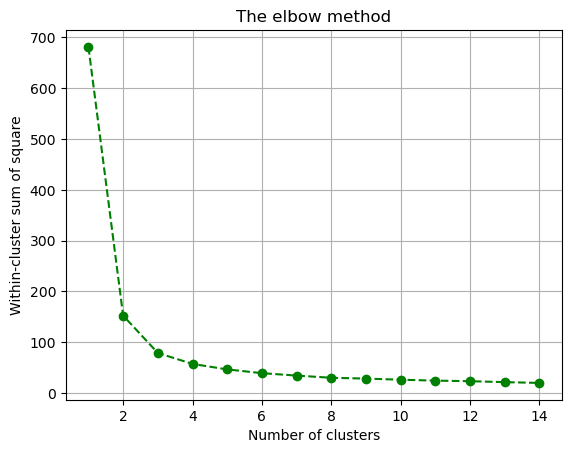

In [21]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

we can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as "3".

**Constructing the model**

In [26]:
k1=KMeans(n_clusters=3,init="k-means++",random_state=0,n_init=10)
y=k1.fit_predict(x)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## 4. Applying k means clustering on the data

**K-Means**<br>
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

In [23]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

## 5. Visualising the clusters

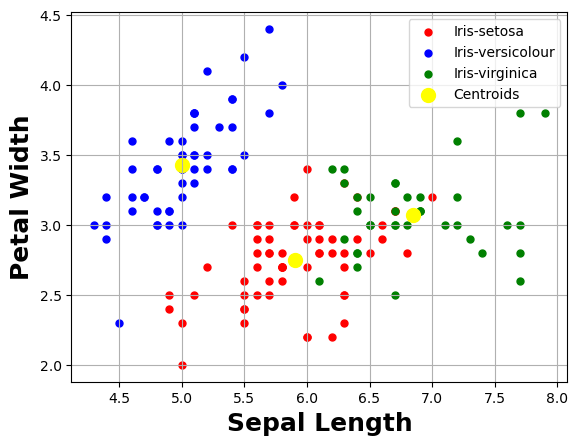

In [27]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.xlabel("Sepal Length", fontweight='bold', fontsize=18)
plt.ylabel("Petal Width", fontweight='bold', fontsize=18)
plt.grid()
plt.show()

By using K- means, we could predict the cluster for the new data point , which is Iris versicolor.

## 6. 3D PLOT

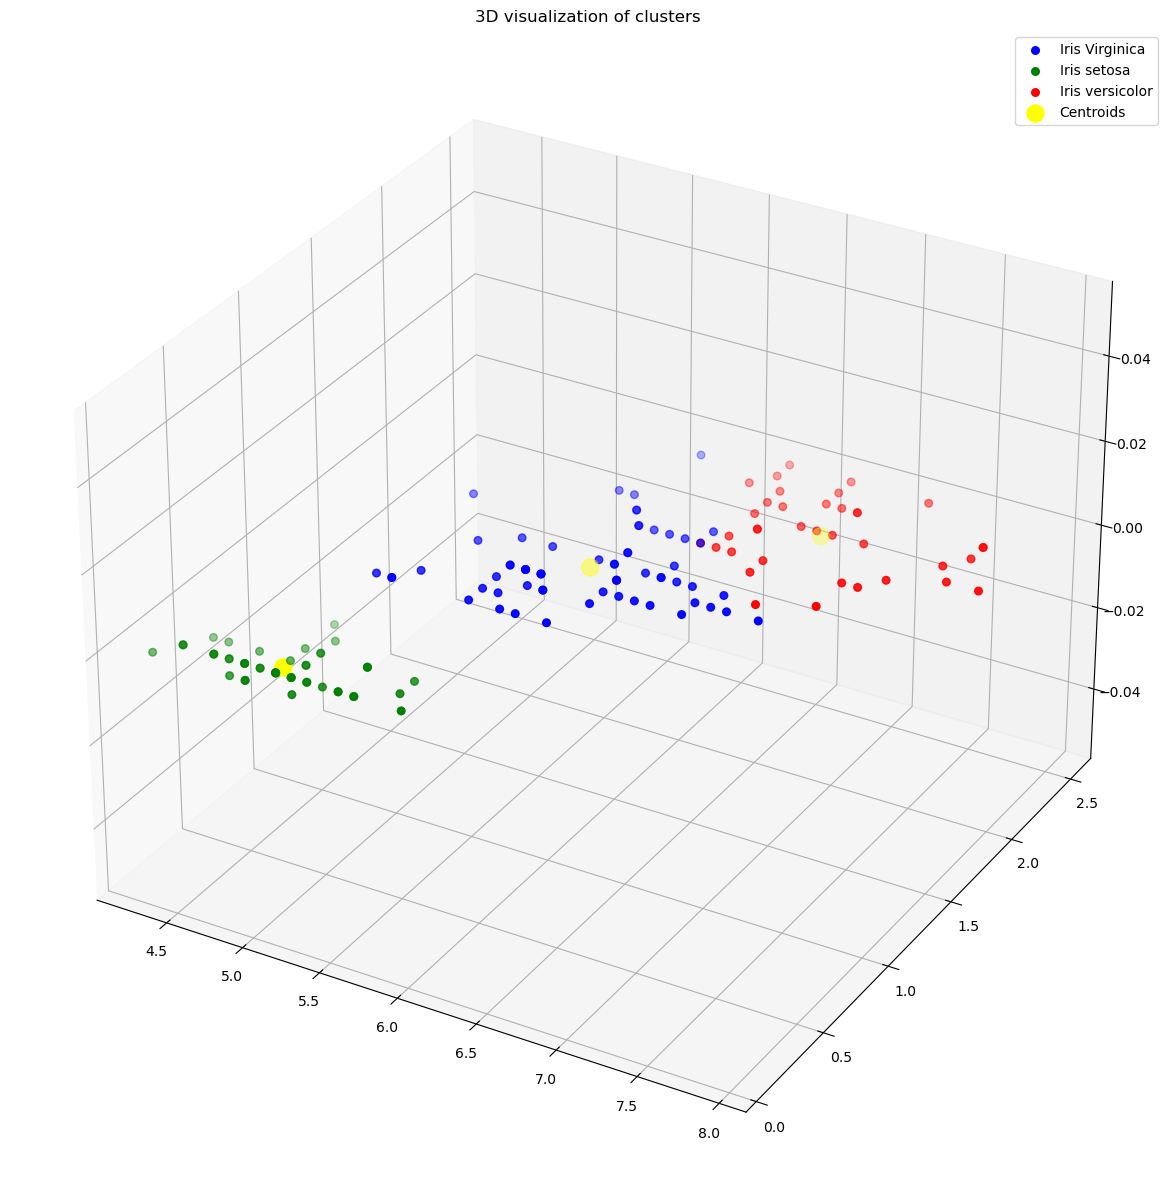

In [29]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x=x[y==0, 0], y=x[y==0, 3],s=30,color= "blue",label="Iris Virginica")
plt.scatter(x=x[y==1, 0], y=x[y==1, 3],s=30,color="green",label="Iris setosa")
plt.scatter(x=x[y==2, 0], y=x[y==2, 3],s=30,color="red",label="Iris versicolor")
plt.scatter(x=k1.cluster_centers_[:,0],y=k1.cluster_centers_[:, 3], s=150, label="Centroids", c="yellow")
plt.grid(False)
plt.legend()
plt.title("3D visualization of clusters")
plt.show()